
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of total cases](#prediction_total_cases)
* [Prediction of total deaths](#prediction_total_deaths)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [45]:
#!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
#print('File downloaded!')
file_name=('cov.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
#os.remove("WHO-COVID-19-global-data.csv")
#print("File Removed!")

File copied to DataFrame!


In [46]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [47]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28269,2020-01-03,GR,Greece,EURO,0,0,0,0
28270,2020-01-04,GR,Greece,EURO,0,0,0,0
28271,2020-01-05,GR,Greece,EURO,0,0,0,0
28272,2020-01-06,GR,Greece,EURO,0,0,0,0
28273,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [48]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28269,2020-01-03,0,0,0,0
28270,2020-01-04,0,0,0,0
28271,2020-01-05,0,0,0,0
28272,2020-01-06,0,0,0,0
28273,2020-01-07,0,0,0,0


#### Renaming columns

In [49]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28269,2020-01-03,0,0,0,0
28270,2020-01-04,0,0,0,0
28271,2020-01-05,0,0,0,0
28272,2020-01-06,0,0,0,0
28273,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [50]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28621,2020-12-19,901,130534,58,4084
28620,2020-12-19,916,129633,96,4026
28619,2020-12-18,1155,128717,78,3948
28618,2020-12-17,1190,127562,85,3870
28617,2020-12-16,1199,126372,98,3785


#### Converting 'Date_reported' to datetime

In [51]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [52]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28621,2020-12-19,901,130534,58,4084
28620,2020-12-19,916,129633,96,4026
28619,2020-12-18,1155,128717,78,3948
28618,2020-12-17,1190,127562,85,3870
28617,2020-12-16,1199,126372,98,3785
28616,2020-12-15,639,125173,62,3687
28615,2020-12-14,692,124534,85,3625
28614,2020-12-13,1194,123842,68,3540
28613,2020-12-12,1395,122648,102,3472
28612,2020-12-11,1533,121253,81,3370


#### Correcting the deviation of the day

In [53]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28621,2020-12-19,901,130534,58,4084
28620,2020-12-18,916,129633,96,4026
28619,2020-12-17,1155,128717,78,3948
28618,2020-12-16,1190,127562,85,3870
28617,2020-12-15,1199,126372,98,3785


In [54]:
df_copy = df_copy.iloc[:-324]

In [55]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [56]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28593,2020-11-21,2309,90121,108,1527
28594,2020-11-22,1498,91619,103,1630
28595,2020-11-23,1387,93006,84,1714
28596,2020-11-24,2131,95137,101,1815
28597,2020-11-25,2151,97288,87,1902
28598,2020-11-26,2018,99306,99,2001
28599,2020-11-27,1981,101287,101,2102
28600,2020-11-28,1747,103034,121,2223
28601,2020-11-29,1193,104227,98,2321
28602,2020-11-30,1044,105271,85,2406


# New cases graph<a name="new_cases_graph"></a>

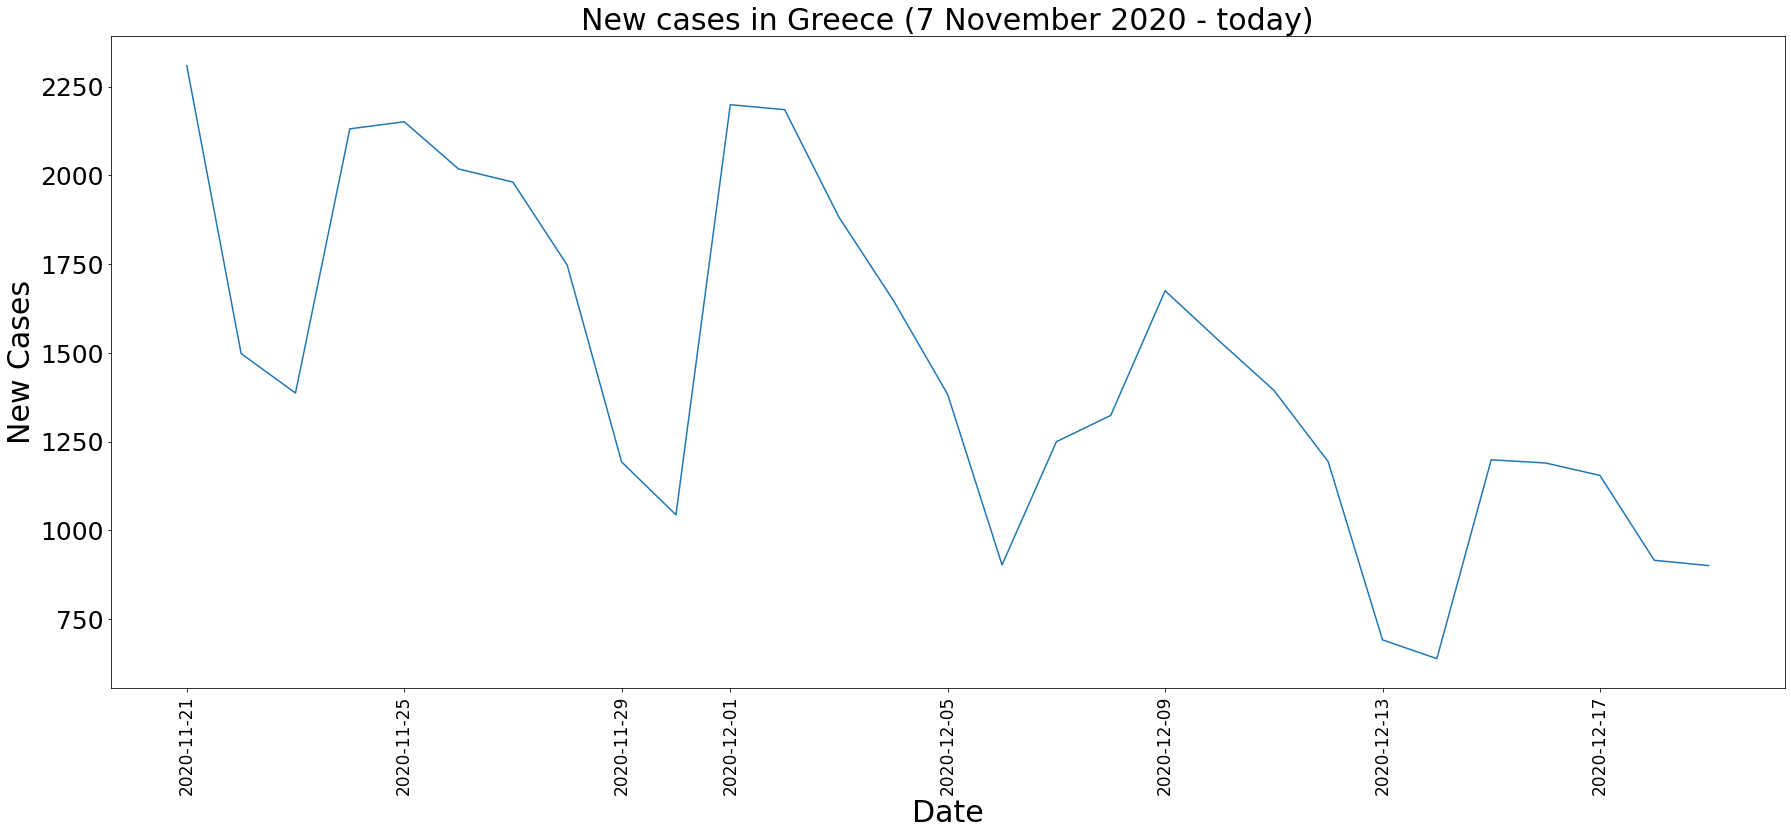

In [57]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

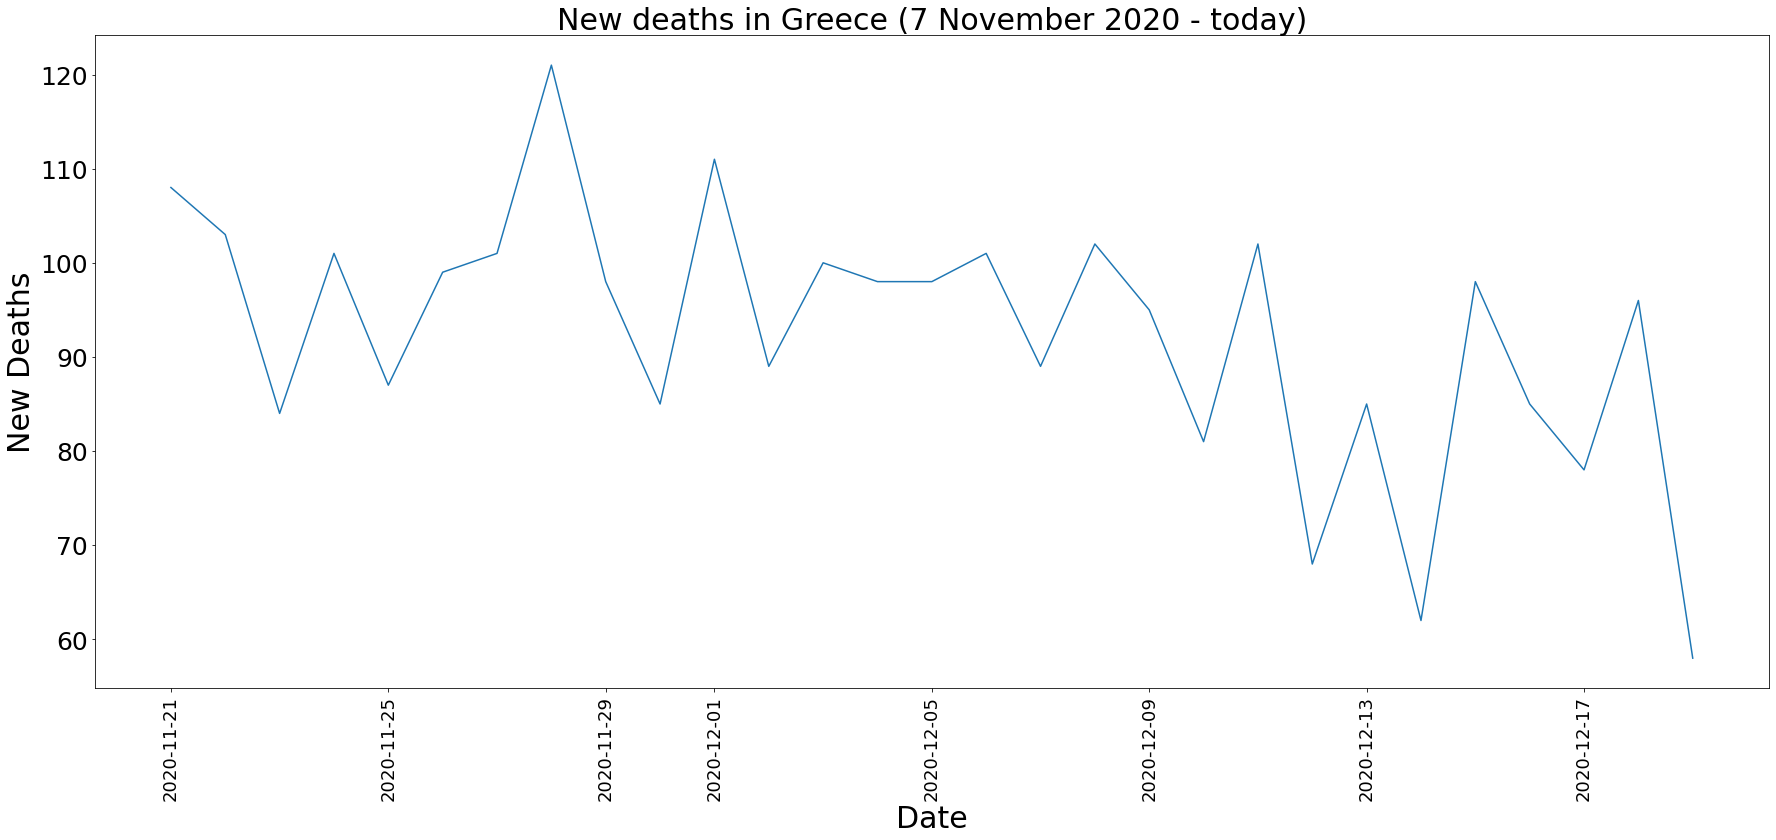

In [58]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

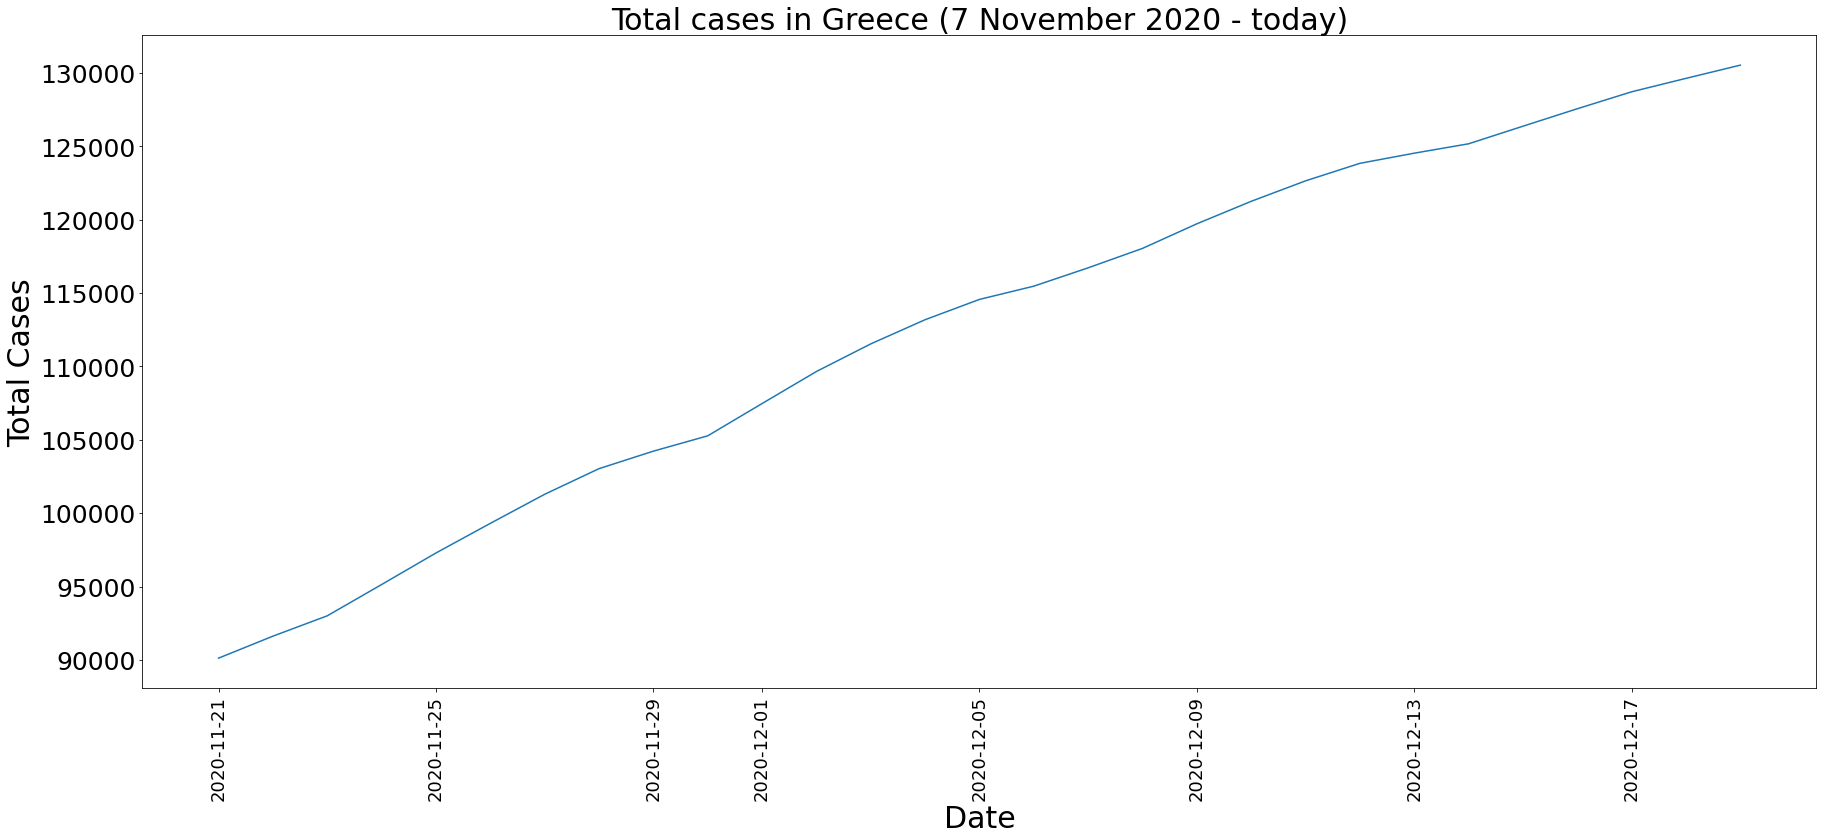

In [59]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

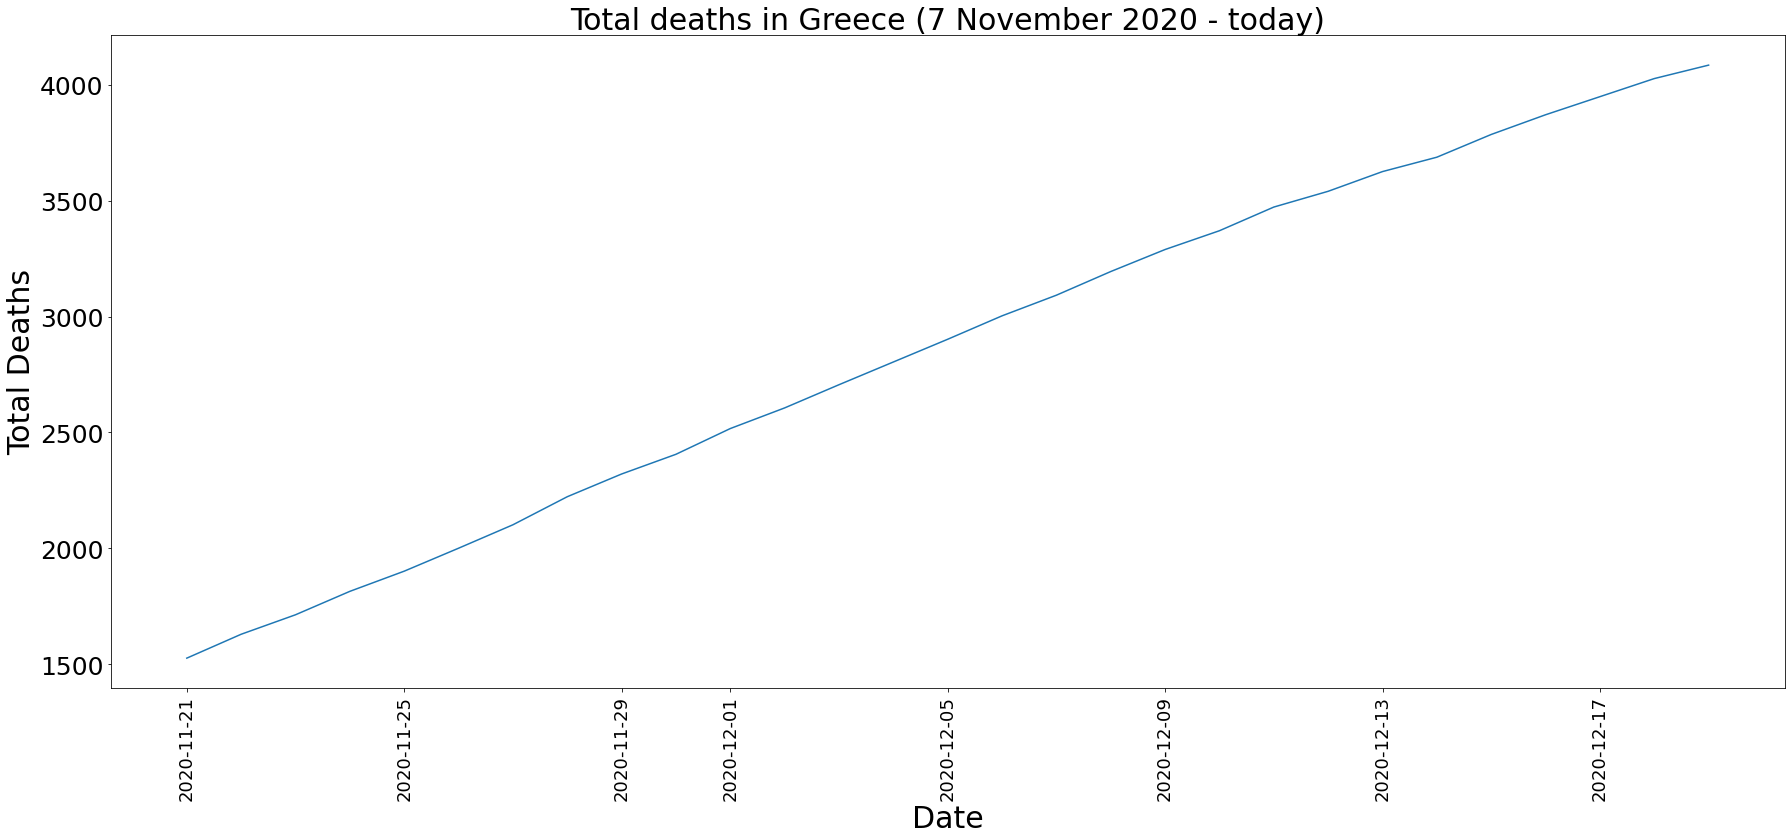

In [60]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [61]:
from fbprophet import Prophet

In [62]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of Total Cases<a name="prediction_total_cases"></a>

In [63]:
total_cases.tail()

,Date_reported,Total_cases
24,2020-12-15,126372
25,2020-12-16,127562
26,2020-12-17,128717
27,2020-12-18,129633
28,2020-12-19,130534


In [64]:
total_cases.columns=['ds','y']

In [65]:
m=Prophet(interval_width=0.95)
m.fit(total_cases)
future_total_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [66]:
forecast_total_cases=m.predict(future_total_cases)
forecast_total_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
29,2020-12-20,130781.533502,130394.233621,131078.515582
30,2020-12-21,131420.533502,130428.558430,132379.146428
31,2020-12-22,132619.533502,130779.505274,134364.236426
32,2020-12-23,133809.533502,130900.938716,136467.880968


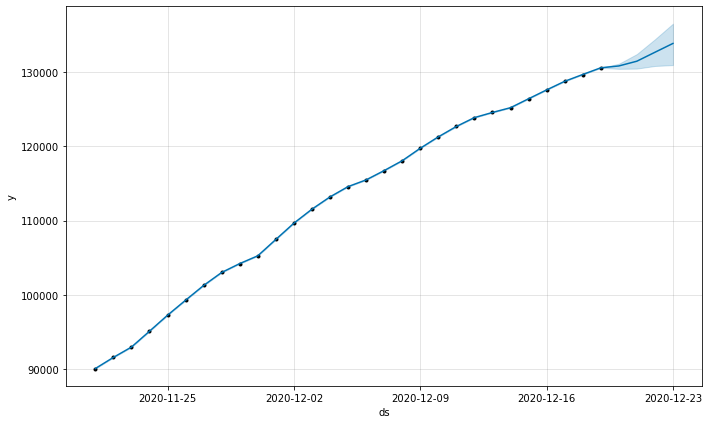

In [67]:
forecast_total_cases_plot=m.plot(forecast_total_cases)

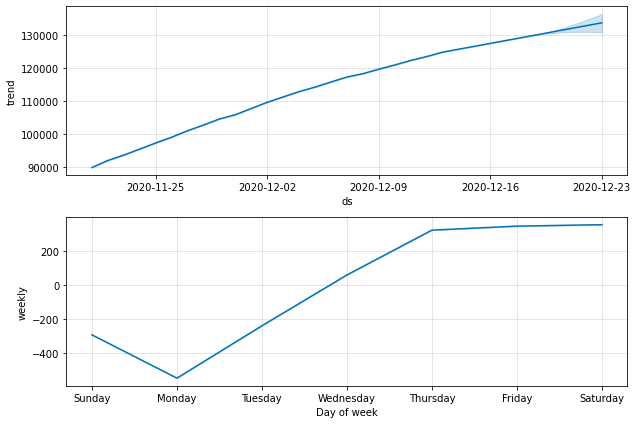

In [68]:
forecast_total_cases_plot=m.plot_components(forecast_total_cases)

## Prediction of total deaths<a name="prediction_total_deaths"></a>

In [69]:
total_deaths.tail()

,Date_reported,Total_deaths
24,2020-12-15,3785
25,2020-12-16,3870
26,2020-12-17,3948
27,2020-12-18,4026
28,2020-12-19,4084


In [70]:
total_deaths.columns=['ds','y']

In [71]:
m=Prophet(interval_width=0.95)
m.fit(total_deaths)
future_total_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [72]:
forecast_total_deaths=m.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
29,2020-12-20,4167.968139,4145.350582,4190.594668
30,2020-12-21,4229.968139,4162.251074,4304.021817
31,2020-12-22,4327.968139,4202.629748,4456.039980
32,2020-12-23,4412.968139,4223.724807,4605.444263


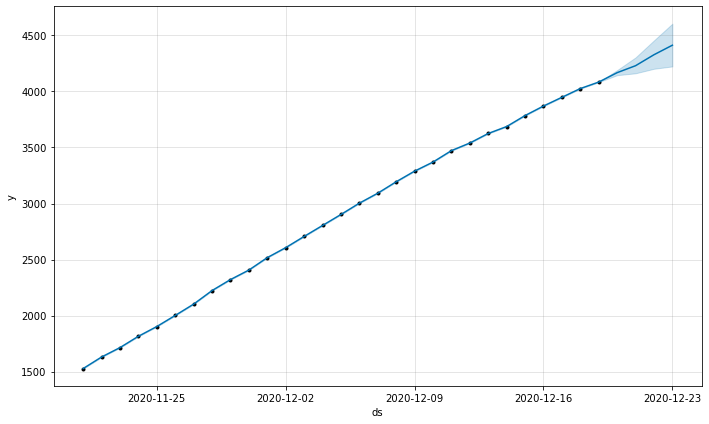

In [73]:
forecast_total_deaths_plot=m.plot(forecast_total_deaths)

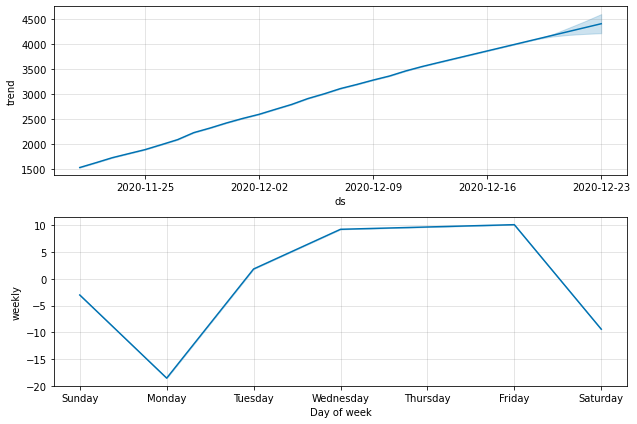

In [74]:
forecast_total_deaths_plot=m.plot_components(forecast_total_deaths)

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [75]:
new_deaths.tail()

,Date_reported,New_deaths
24,2020-12-15,98
25,2020-12-16,85
26,2020-12-17,78
27,2020-12-18,96
28,2020-12-19,58


In [76]:
new_deaths.columns=['ds','y']

In [77]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [78]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
29,2020-12-20,80.218639,62.659195,98.105166
30,2020-12-21,63.492296,45.564988,82.107334
31,2020-12-22,86.452909,68.716770,104.934864
32,2020-12-23,72.472705,54.419888,88.846790


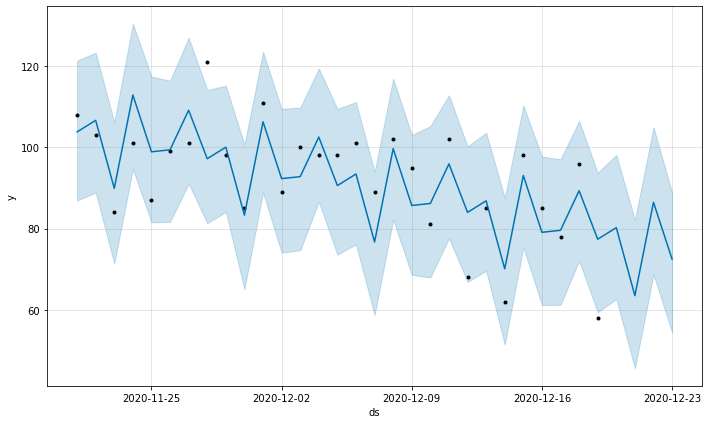

In [79]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

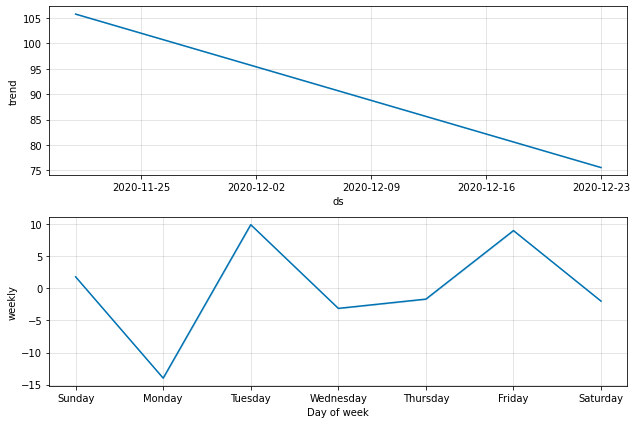

In [80]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [81]:
new_cases.tail()

,Date_reported,New_cases
24,2020-12-15,1199
25,2020-12-16,1190
26,2020-12-17,1155
27,2020-12-18,916
28,2020-12-19,901


In [82]:
new_cases.columns=['ds','y']

In [83]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [84]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
29,2020-12-20,292.375795,64.036022,561.591726
30,2020-12-21,300.876043,24.956397,541.784949
31,2020-12-22,934.128724,681.420258,1203.918394
32,2020-12-23,1021.129278,769.244853,1289.660788


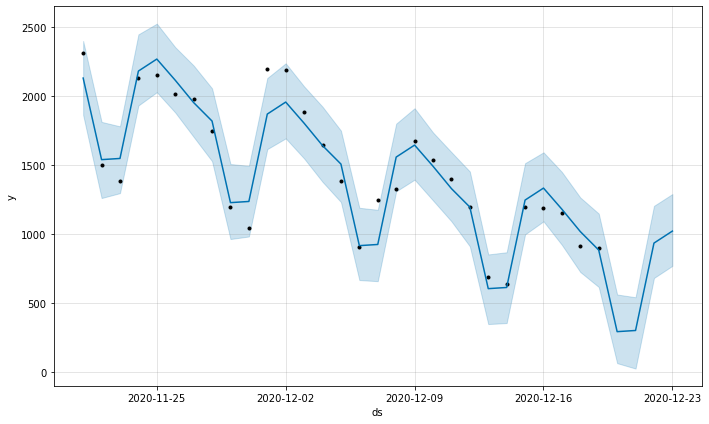

In [85]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

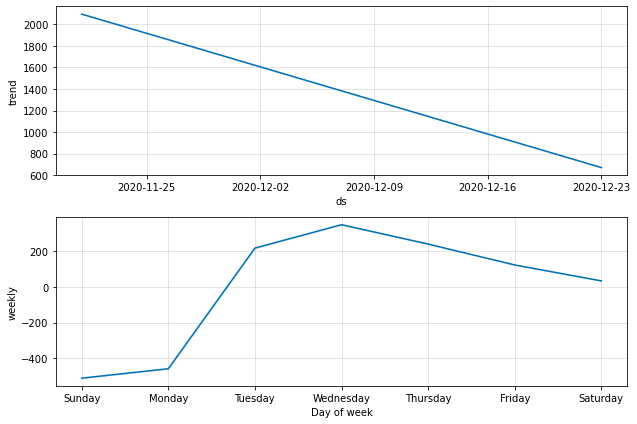

In [86]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)